In [3]:
import pandas as pd

# Caminho para o arquivo CSV
CSV_FILE = "resultsnew.csv"

# Carregar o CSV em um DataFrame
df = pd.read_csv(CSV_FILE)

# Preencher valores NaN nas colunas relevantes com 'Not Available' para facilitar análise
df.fillna({"Time(s)": "NaN", "Cost": "NaN", "Error": "No Error"}, inplace=True)

# Filtrar apenas instâncias bem-sucedidas
successful_runs = df[df["Success"] == True]

In [4]:
# Gráfico de tempo de execução por número de nós
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas os algoritmos TATT e Christofides
tatt_christofides = successful_runs[successful_runs["Algorithm"].isin(["Twice-Around-the-Tree", "Christofides"])]

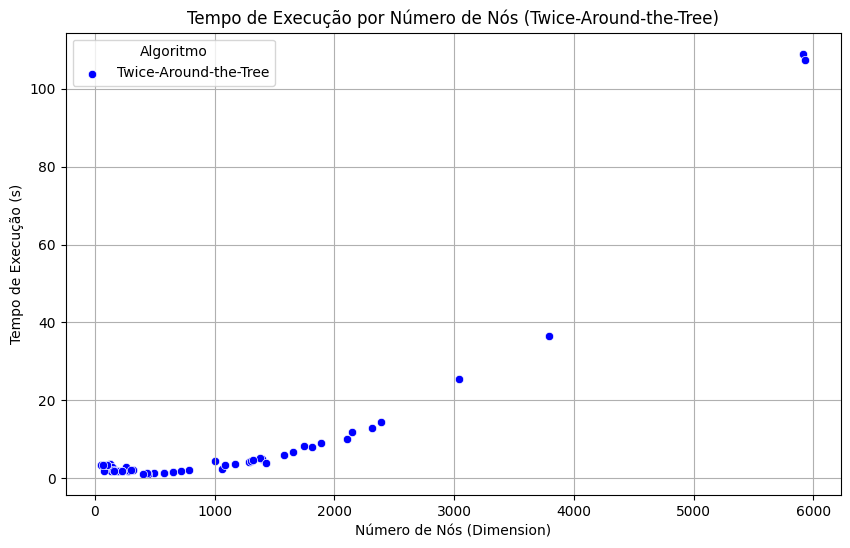

In [5]:
# Gráfico de tempo de execução por número de nós para TATT
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tatt_christofides[tatt_christofides["Algorithm"] == "Twice-Around-the-Tree"],
    x="Dimension",
    y="Time(s)",
    color="blue",
    label="Twice-Around-the-Tree",
)
plt.title("Tempo de Execução por Número de Nós (Twice-Around-the-Tree)")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Tempo de Execução (s)")
plt.legend(title="Algoritmo")
plt.grid(True)
plt.show()

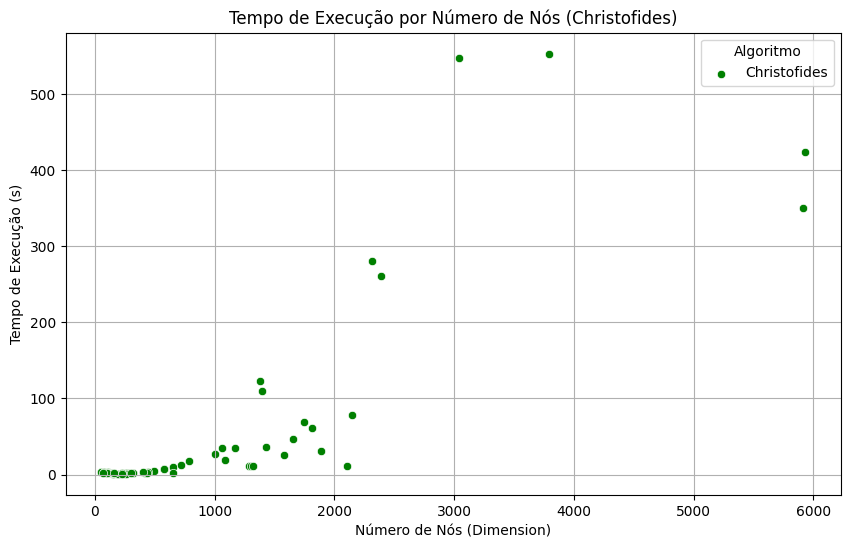

In [6]:
# Gráfico de tempo de execução por número de nós para Christofides
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tatt_christofides[tatt_christofides["Algorithm"] == "Christofides"],
    x="Dimension",
    y="Time(s)",
    color="green",
    label="Christofides",
)
plt.title("Tempo de Execução por Número de Nós (Christofides)")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Tempo de Execução (s)")
plt.legend(title="Algoritmo")
plt.grid(True)
plt.show()

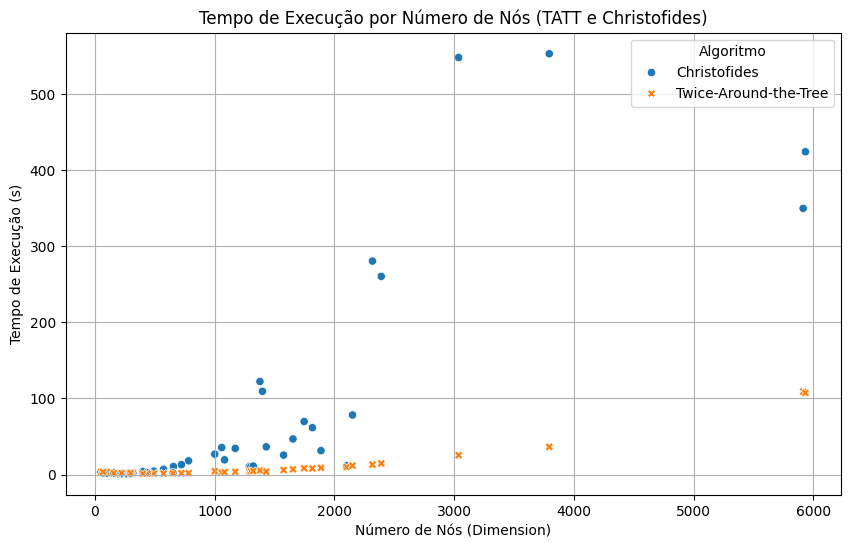

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tatt_christofides, x="Dimension", y="Time(s)", hue="Algorithm", style="Algorithm")
plt.title("Tempo de Execução por Número de Nós (TATT e Christofides)")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Tempo de Execução (s)")
plt.legend(title="Algoritmo")
plt.grid(True)
plt.show()

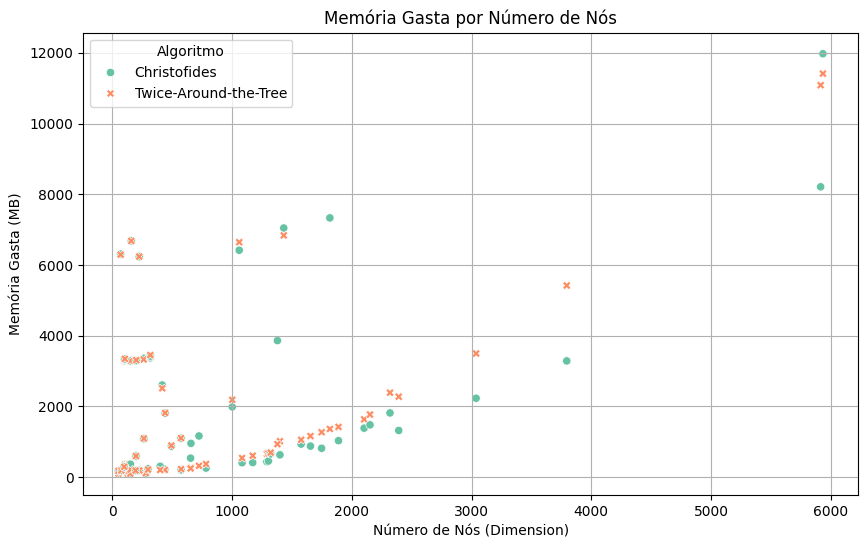

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar dados relevantes para os algoritmos TATT e Christofides
memory_data = successful_runs[successful_runs["Algorithm"].isin(["Twice-Around-the-Tree", "Christofides"])]

# Gráfico de Memória por Número de Nós
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=memory_data,
    x="Dimension",
    y="Memory(MB)",
    hue="Algorithm",
    style="Algorithm",
    palette="Set2"
)
plt.title("Memória Gasta por Número de Nós")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Memória Gasta (MB)")
plt.legend(title="Algoritmo")
plt.grid(True)
plt.show()


Custo médio por algoritmo:
Algorithm
Christofides              93981.178248
Twice-Around-the-Tree    118286.645454
Name: Cost, dtype: float64

Tempo médio por algoritmo:
Algorithm
Christofides             45.895688
Twice-Around-the-Tree     7.270417
Name: Time(s), dtype: float64


<ipython-input-9-431cf51e00cf>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tatt_christofides, x="Algorithm", y="Cost", ax=axes[0], ci=None)
<ipython-input-9-431cf51e00cf>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tatt_christofides, x="Algorithm", y="Time(s)", ax=axes[1], ci=None)


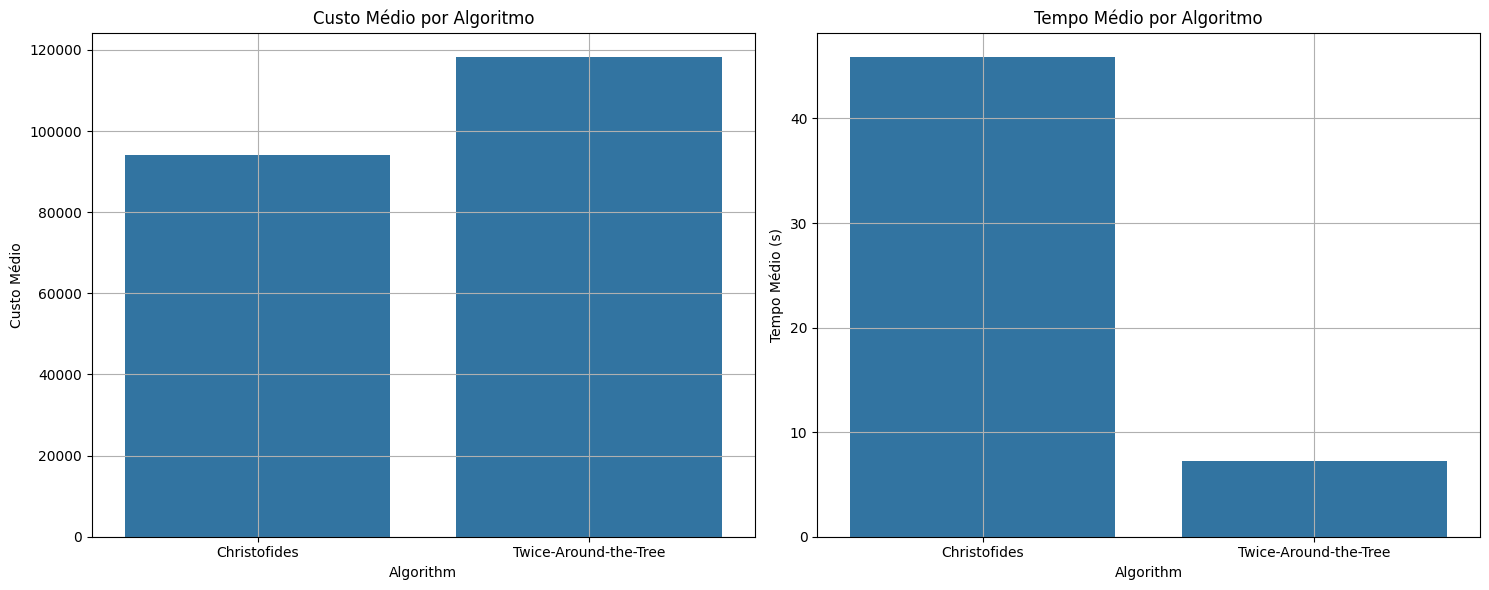

In [9]:
# Comparar custos médios
avg_cost_comparison = tatt_christofides.groupby("Algorithm")["Cost"].mean()
print("\nCusto médio por algoritmo:")
print(avg_cost_comparison)

# Comparar tempos médios
avg_time_comparison = tatt_christofides.groupby("Algorithm")["Time(s)"].mean()
print("\nTempo médio por algoritmo:")
print(avg_time_comparison)

# Gráficos comparativos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Comparação de custos
sns.barplot(data=tatt_christofides, x="Algorithm", y="Cost", ax=axes[0], ci=None)
axes[0].set_title("Custo Médio por Algoritmo")
axes[0].set_ylabel("Custo Médio")
axes[0].grid(True)

# Comparação de tempos
sns.barplot(data=tatt_christofides, x="Algorithm", y="Time(s)", ax=axes[1], ci=None)
axes[1].set_title("Tempo Médio por Algoritmo")
axes[1].set_ylabel("Tempo Médio (s)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Caminho para o arquivo de custos ótimos
optimal_costs_path = "optimal_costs.csv"

# Carregar custos ótimos
optimal_costs = pd.read_csv(optimal_costs_path)
optimal_costs.set_index("Instance", inplace=True)

# Assuming 'results' should be 'df', change the variable name
df["OptimalCost"] = df["Instance"].map(optimal_costs["OptimalCost"])

# Convert 'Cost' column to numeric, coercing errors to NaN
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")

# Calculate the approximation factor based on the optimal cost
df["Approx_Factor_Optimal"] = df["Cost"] / df["OptimalCost"]

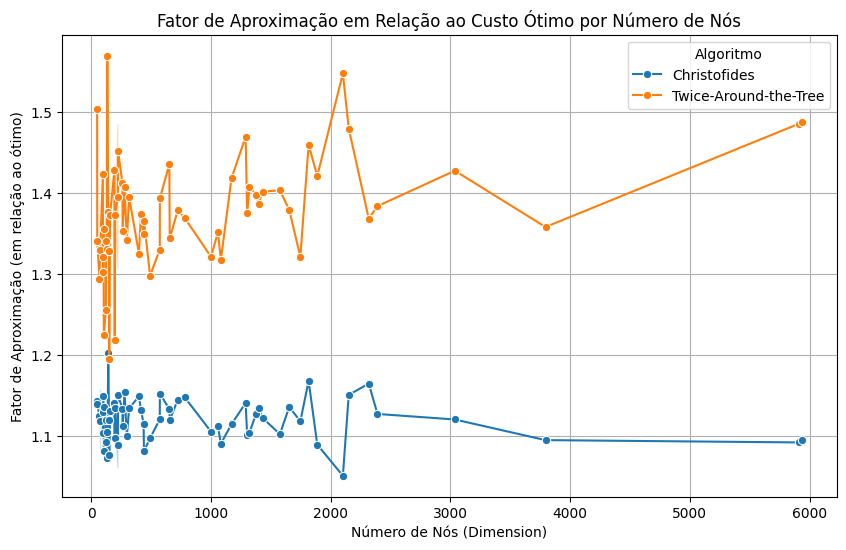

In [11]:
# Filtrar instâncias válidas (com custo ótimo disponível)
valid_results = df[df["OptimalCost"].notnull()] # Changed 'results' to 'df'

# Gráfico: Fator de Aproximação (em relação ao ótimo) por número de nós
plt.figure(figsize=(10, 6))
sns.lineplot(data=valid_results, x="Dimension", y="Approx_Factor_Optimal", hue="Algorithm", marker="o")
plt.title("Fator de Aproximação em Relação ao Custo Ótimo por Número de Nós")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Fator de Aproximação (em relação ao ótimo)")
plt.legend(title="Algoritmo")
plt.grid(True)
plt.show()

In [12]:
df["Deviation(%)"] = 100 * (df["Cost"] - df["OptimalCost"]) / df["OptimalCost"]
avg_deviation = df.groupby("Algorithm")["Deviation(%)"].mean()
print("\nDesvio percentual médio por algoritmo:")
print(avg_deviation)


Desvio percentual médio por algoritmo:
Algorithm
Christofides             11.889795
Twice-Around-the-Tree    36.994363
Name: Deviation(%), dtype: float64


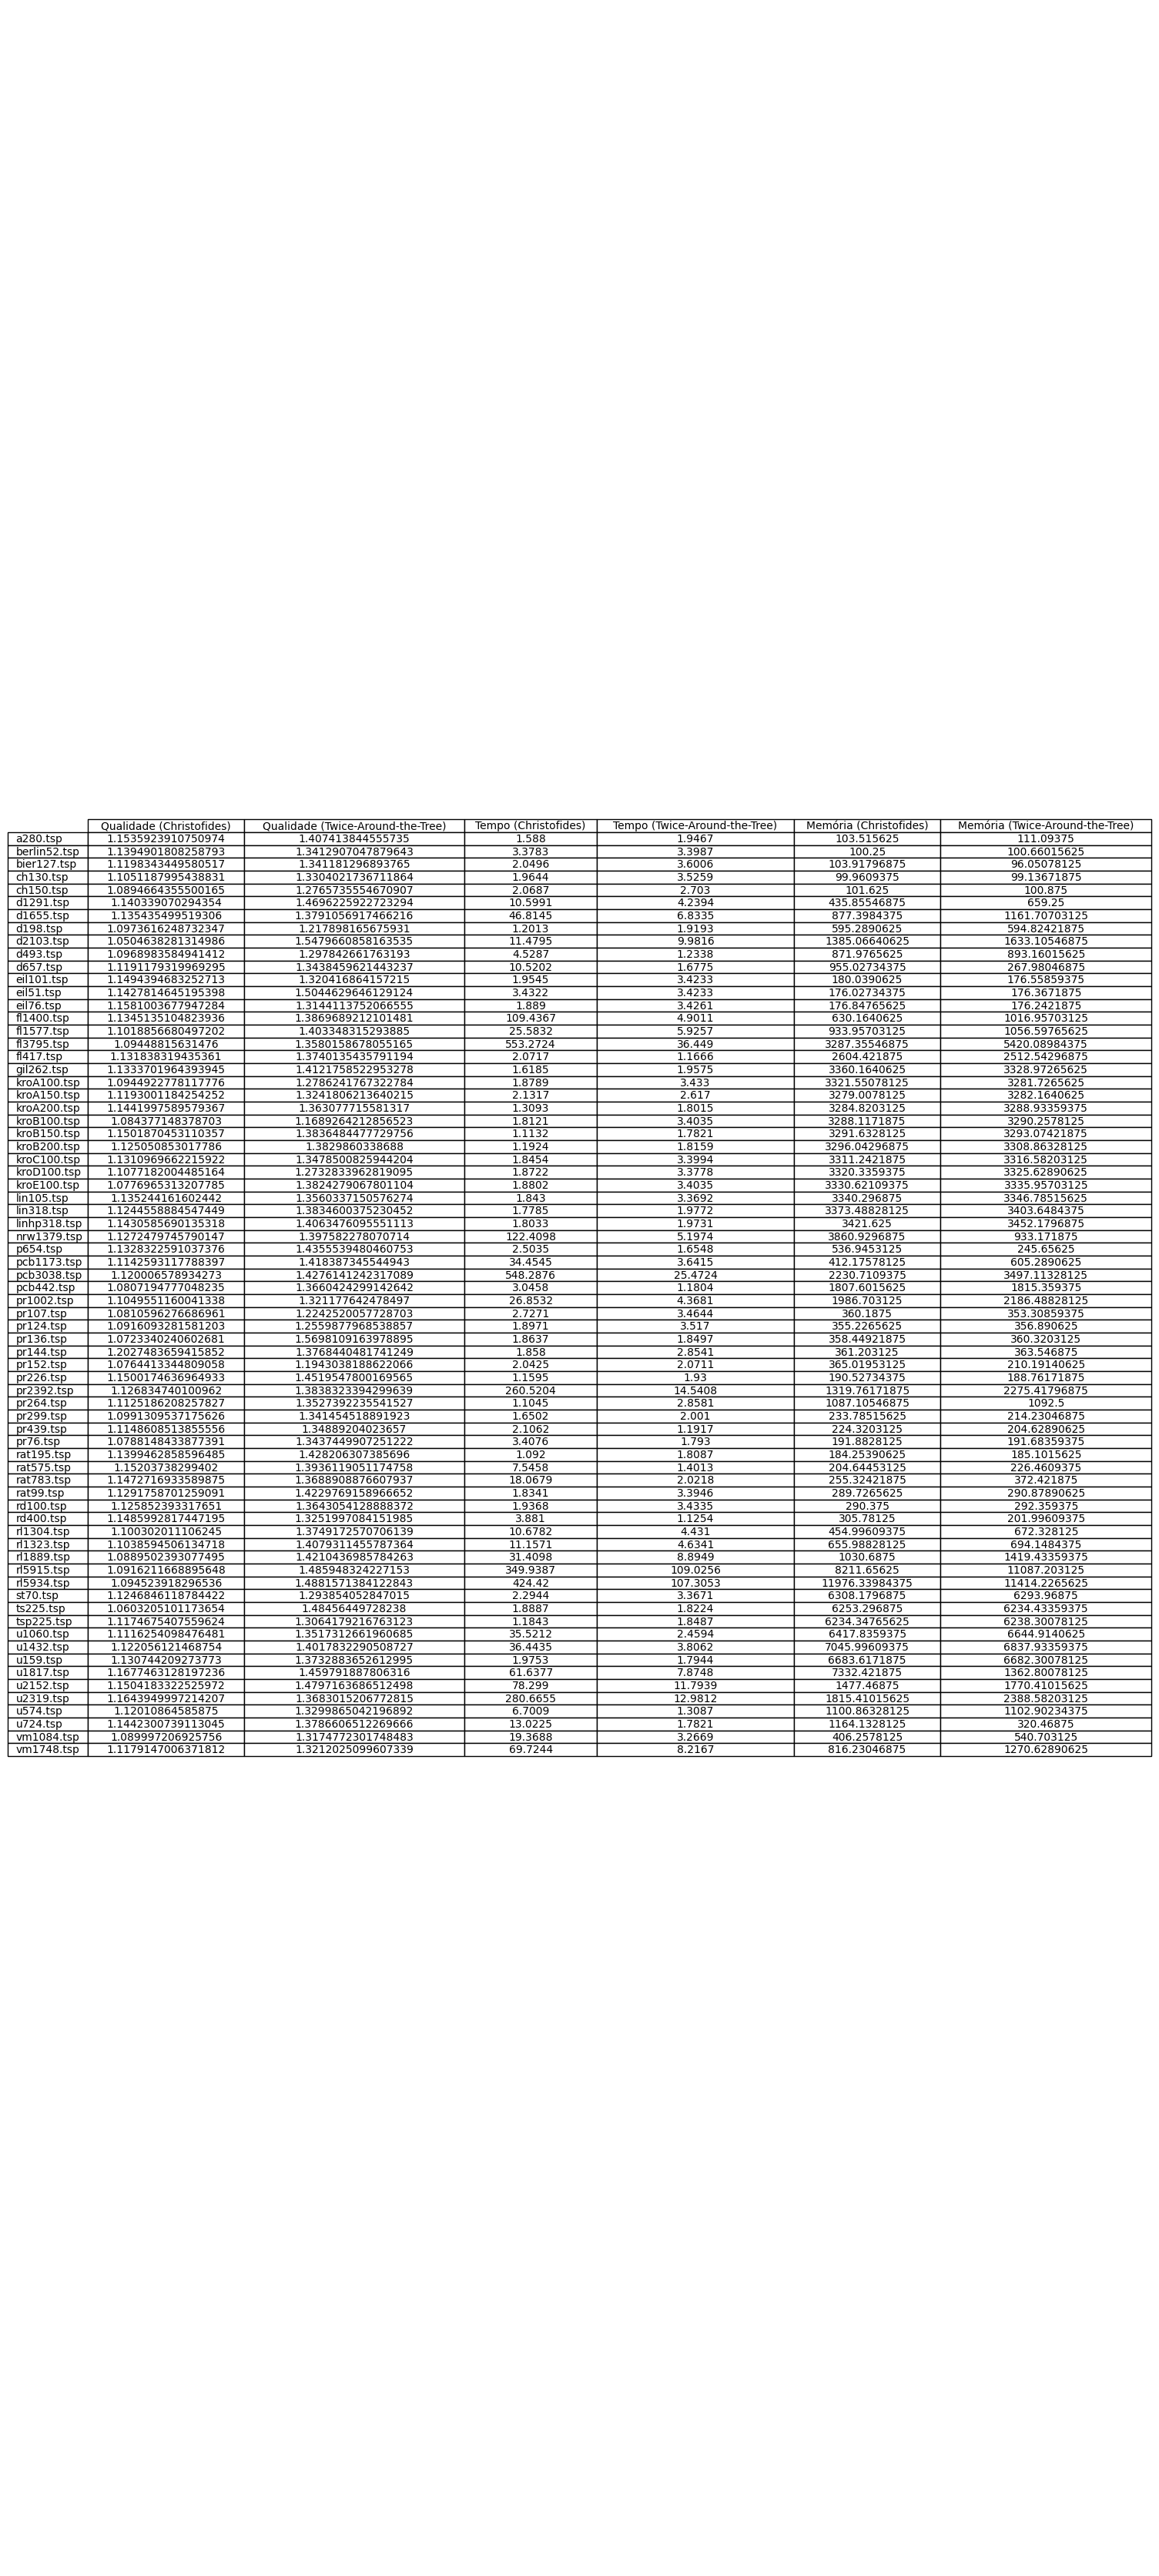

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assumindo que o DataFrame df contém as colunas 'OptimalCost', 'Cost', 'Memory(MB)', e 'Algorithm'

# Calcular a Qualidade (Quality)
df["Quality"] = df["Cost"] / df["OptimalCost"]

# Filtrar para obter as execuções bem-sucedidas com Qualidade
filtered_data = df[df["Success"] == True]
filtered_data = filtered_data[filtered_data["Algorithm"].isin(["Twice-Around-the-Tree", "Christofides"])]

# Selecionar as colunas relevantes
table_data = filtered_data[["Instance", "Algorithm", "Quality", "Time(s)", "Memory(MB)"]]

# Pivotar os dados para organizá-los melhor
pivot_table = table_data.pivot(index="Instance", columns="Algorithm", values=["Quality", "Time(s)", "Memory(MB)"])

# Renomear as colunas
pivot_table.columns = [
    "Qualidade (Christofides)",
    "Qualidade (Twice-Around-the-Tree)",
    "Tempo (Christofides)",
    "Tempo (Twice-Around-the-Tree)",
    "Memória (Christofides)",
    "Memória (Twice-Around-the-Tree)"
]

# Reordenar as colunas
pivot_table = pivot_table[
    ["Qualidade (Christofides)", "Qualidade (Twice-Around-the-Tree)",
     "Tempo (Christofides)", "Tempo (Twice-Around-the-Tree)",
     "Memória (Christofides)", "Memória (Twice-Around-the-Tree)"]
]

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(14, len(pivot_table) * 0.6))  # Ajustar a altura conforme o número de instâncias
ax.axis("tight")
ax.axis("off")

# Adicionar a tabela
tbl = table(ax, pivot_table, loc="center", cellLoc="center", colWidths=[0.2] * len(pivot_table.columns))

# Estilizar a tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(pivot_table.columns))))

# Salvar a tabela como PNG
plt.savefig("comparison_table_with_memory.png", bbox_inches="tight", dpi=300)
plt.show()

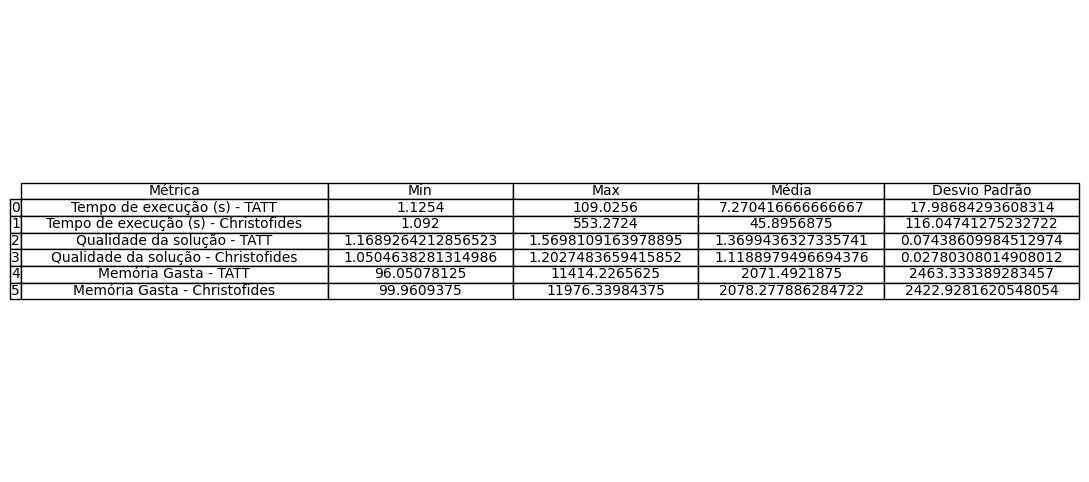

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

# Calcular as métricas (min, max, média, desvio padrão) para as colunas relevantes
summary_data = df[df["Algorithm"].isin(["Twice-Around-the-Tree", "Christofides"])]
metrics = summary_data.groupby("Algorithm").agg({
    "Time(s)": ["min", "max", "mean", "std"],
    "Cost": ["min", "max", "mean", "std"],
    "Quality": ["min", "max", "mean", "std"],
    "Memory(MB)": ["min", "max", "mean", "std"],
}).reset_index()

# Ajustar os nomes das colunas para o estilo desejado
metrics.columns = [
    "Algoritmo", "Tempo Min", "Tempo Max", "Tempo Médio", "Tempo Desvio",
    "Custo Min", "Custo Max", "Custo Médio", "Custo Desvio",
    "Qualidade Min", "Qualidade Max", "Qualidade Média", "Qualidade Desvio",
    "Memória Min", "Memória Max", "Memória Média", "Memória Desvio"
]

# Reformatar para um layout de tabela estilo artigo
table_data = pd.DataFrame({
    "Métrica": [
        "Tempo de execução (s) - TATT",
        "Tempo de execução (s) - Christofides",
        "Qualidade da solução - TATT",
        "Qualidade da solução - Christofides",
        "Memória Gasta - TATT",
        "Memória Gasta - Christofides",
    ],
    "Min": [
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Tempo Min"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Tempo Min"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Qualidade Min"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Qualidade Min"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Memória Min"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Memória Min"].values[0],
    ],
    "Max": [
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Tempo Max"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Tempo Max"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Qualidade Max"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Qualidade Max"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Memória Max"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Memória Max"].values[0],
    ],
    "Média": [
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Tempo Médio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Tempo Médio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Qualidade Média"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Qualidade Média"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Memória Média"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Memória Média"].values[0],
    ],
    "Desvio Padrão": [
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Tempo Desvio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Tempo Desvio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Qualidade Desvio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Qualidade Desvio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Twice-Around-the-Tree", "Memória Desvio"].values[0],
        metrics.loc[metrics["Algoritmo"] == "Christofides", "Memória Desvio"].values[0],
    ]
})

# Configurar o plot da tabela
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar a altura para incluir as novas linhas
ax.axis("tight")
ax.axis("off")

# Adicionar a tabela ao plot
tbl = table(ax, table_data, loc="center", cellLoc="center", colWidths=[0.2] * len(table_data.columns))

# Configurar estilo da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(table_data.columns))))

# Salvar a tabela como imagem
plt.savefig("comparative_analysis_table_with_memory.png", bbox_inches="tight", dpi=300)
plt.show()

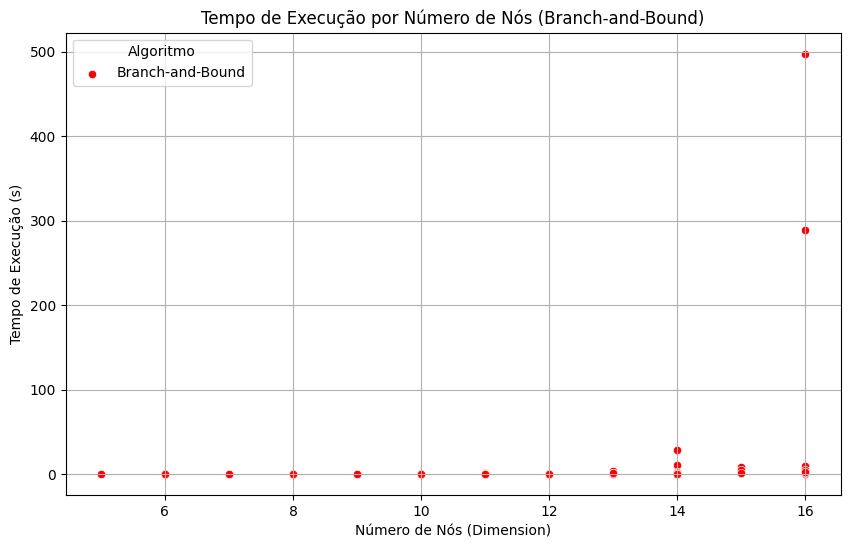

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
file_path = "resultsnew1.csv"  # Substitua pelo caminho correto do arquivo
data = pd.read_csv(file_path)

# Filtrar os dados apenas para o algoritmo Branch-and-Bound
branch_and_bound_data = data[data["Algorithm"] == "Branch-and-Bound"]

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=branch_and_bound_data,
    x="Dimension",
    y="Time(s)",
    color="red",
    label="Branch-and-Bound",
)

# Personalizar o gráfico
plt.title("Tempo de Execução por Número de Nós (Branch-and-Bound)")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Tempo de Execução (s)")
plt.legend(title="Algoritmo")
plt.grid(True)

# Mostrar o gráfico
plt.show()

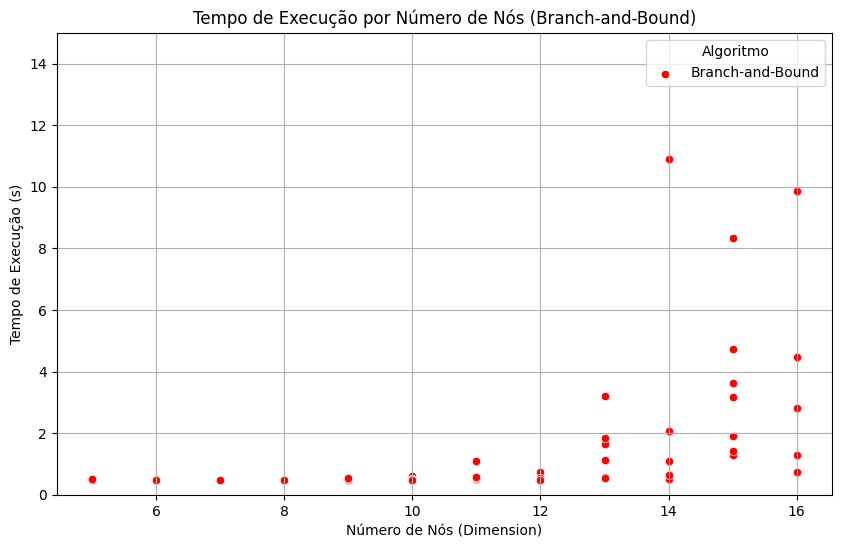

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
file_path = "resultsnew1.csv"  # Substitua pelo caminho correto do arquivo
data = pd.read_csv(file_path)

# Filtrar os dados apenas para o algoritmo Branch-and-Bound
branch_and_bound_data = data[data["Algorithm"] == "Branch-and-Bound"]

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=branch_and_bound_data,
    x="Dimension",
    y="Time(s)",
    color="red",
    label="Branch-and-Bound",
)

# Personalizar o gráfico
plt.title("Tempo de Execução por Número de Nós (Branch-and-Bound)")
plt.xlabel("Número de Nós (Dimension)")
plt.ylabel("Tempo de Execução (s)")
plt.ylim(0, 15)  # Definir os limites do eixo y
plt.legend(title="Algoritmo")
plt.grid(True)

# Mostrar o gráfico
plt.show()